# Practice session 5: section 6

# Background

Integration can be performed on functions that we know, but also on functions that we don't know. One such function can describe the shape of a polygon such as the cross-section of a river. 

# Problem

## Background

When estimating such a polygon we will have measurements of the depth of the river taken at regular intervals.

## Data


The depths of a river H are measured at equally spaced distances across a channel as tabulated below. The river’s crosssectional area can be determined by integration as in

$$ \int_0^xH(x)dx$$

```
x, m |  0  2    4  6  8    10   12    14    16
H, m |  0  1.9  2  2  2.4  2.6  2.25  1.12  0
```



## Tasks

* Determine the cross-sectional area, both by the trapezoidal rule and by the 1/3 Simpson's rule with multiple application.

* Fit cuadratic splines to the first 4 points, and then calculate the area under that curve with multiple application of the 1/3 Simpons's rule, considering 25 segments. 

    * Hint: when you build a big sparse matrix, you don't need to write the zeroes. Just use `np.zeroes()` and fill in the non-zero values. If you're feeling adventurous, you can check the [documentation for sparse matrices in scipy]. 
    * Use [numpy.linalg.solve] to solve the matrix
    * It might be worth it to write a function to build the matrix, since it's pretty big.
    * You can do this part manually or with a function. With a function it's probably a lot more fun.


* Plot the cross section and your splines.

* How does the 1/3 Simpson's rule result compare to the result with splines? Why?

[documentation for sparse matrices in scipy]: https://docs.scipy.org/doc/scipy/reference/sparse.html
[numpy.linalg.solve]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html

## Solution



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
%matplotlib inline

xs = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
hs = np.array([0, 1.9, 2, 2, 2.4, 2.6, 2.25, 1.12, 0])

### Trapezoidal rule

In [2]:
area = 0

for segment in range(len(xs) - 1):
    a = xs[segment]
    b = xs[segment + 1]
    ha = hs[segment]
    hb = hs[segment + 1]
    
    
    area += (b-a)*(hb + ha)/2
    
area

28.540000000000006

### 1/3 Simpson's rule

The equation is:

$$\int_a^b f(x)dx \approx \int_a^b f_2(x)dx \approx \frac{b-a}{6}[f(x_0) + 4f(x_1) +f(x_2)]$$

We need three points for each segment, so we will only be able to get 4 segments.

In [3]:
area = 0

for segment in list(range(0,len(xs) - 1,2)):
    a = xs[segment]
    b = xs[segment + 2]
    hx0 = hs[segment]
    hx1 = hs[segment + 1]
    hx2 = hs[segment + 2]
    
    
    area += (b-a)*(hx0 + 4*hx1 + hx2)/6
    
area

29.18666666666667

### Fit quadratic splines to the first 4 points (3 segments)

We have 4 points, so we'll fit 3 second-degree functions. Remember:

* The function values of adjacent polynomials must be equal at the interior knots.
* The first and last functions must pass through the end points.
* The first derivatives at the interior knots must be equal.
* Assume that the second derivative is zero at the first point

All of that should add to 9 equations.

### Manually

In [4]:
AB = np.zeros((24,25))

# f1'' at x=0
AB[0,0] = 2

# f1 at x=2
AB[1, :3] = [4,2,1] # x**2, x**1, x**0
AB[1,-1] = 1.9 # H at x=2

# f1 at x=0
AB[2, :3] = [0,0,1]
AB[2,-1] = 0

# f1' and f2' at x=2
AB[3, :2] = [4,1]
AB[3, 3:5] = [-4,-1]

# f2 at x=2
AB[4, 3:6] = [4,2,1]
AB[4, -1] = 1.9

# f2 at x=4
AB[5, 3:6] = [16,4,1]
AB[5, -1] = 2

# f2' and f3' at x=4
AB[6, 3:5] = [8,1]
AB[6, 6:8] = [-8,-1]
 
# f3 at x=4
AB[7, 6:9] = [16, 4, 1]
AB[7, -1] = 2

# f3 at x=6
AB[8, 6:9] = [36, 6, 1]    
AB[8, -1] = 2

# f3' and f4; at x=6
AB[9, 6:8] = [12, 1]
AB[9, 9:11] = [-12, -1]

# f4 at x=6
AB[10, 9:12] = [36,6,1]
AB[10, -1] = 2

# f4 at x=8
AB[11, 9:12] = [64,8,1]
AB[11, -1] = 2.4

# f4' and f5' at x=8
AB[12, 9:11] = [16, 1]
AB[12, 12:14] = [-16, -1]

# f5 at x=8
AB[13, 12:15] = [64, 8, 1]
AB[13, -1] = 2.4

# f5 at x=10
AB[14, 12:15] = [100, 10, 1]
AB[14, -1] = 2.6

# f5' and f6' at x=10
AB[15, 12:14] = [20, 1]
AB[15, 15:17] = [-20, -1]

# f6 at x=10
AB[16, 15:18] = [100, 10, 1]
AB[16, -1] = 2.6

# f6 at x=12
AB[17, 15:18] = [144, 12, 1]
AB[17, -1] = 2.25

# f6' and f7' at x=12
AB[18, 15:17] = [24, 1]
AB[18, 18:20] = [-24,-1]

# f7 at x=12
AB[19, 18:21] = [144, 12, 1]
AB[19, -1] = 2.25

# f7 at x=14
AB[20, 18:21] = [176, 14, 1]
AB[20, -1] = 1.12

# f7' and f8' at x=14
AB[21, 18:20] = [28, 1]
AB[21, 21:23] = [-28,-1]

# f8 at x=14
AB[22, 21:24] = [176,14,1]
AB[22, -1] = 0

# f8 at x=16
AB[23, 21:24] = [256, 16, 1]
AB[23, -1] = 0

    
AB[:10,:10]

array([[  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  4.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  4.,   1.,   0.,  -4.,  -1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   4.,   2.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  16.,   4.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   8.,   1.,   0.,  -8.,  -1.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  16.,   4.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  36.,   6.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  12.,   1.,   0., -12.]])

In [5]:
la.solve(AB[:,:-1], AB[:,-1])

array([  0.        ,   0.95      ,   0.        ,  -0.45      ,
         2.75      ,  -1.8       ,   0.425     ,  -4.25      ,
        12.2       ,  -0.325     ,   4.75      , -14.8       ,
         0.275     ,  -4.85      ,  23.6       ,  -0.4125    ,
         8.9       , -45.15      ,  -0.054375  ,   0.305     ,
         6.42      ,   0.10145833,  -4.05833333,  38.96      ])

### With a function for the general case

In [6]:
xs = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
hs = np.array([0, 1.9, 2, 2, 2.4, 2.6, 2.25, 1.12, 0])

npoints = None
xs = xs[:npoints]
fs = hs[:npoints]
eq=0
eqs = 3 * (len(xs) - 1)
AB = np.zeros((eqs, eqs+1))

#f1'' at first point
AB[eq,0] = 1
eq+=1

for i, (x, fx) in enumerate(zip(xs, fs)):    
    # 3 coefficients per quadratic equation: a, b, c
    start = (i-1) * 3
    
    if i != 0:
        # fleft at x
        AB[eq, start : start+3] = [x**2, x**1, x**0]
        AB[eq, -1] = fx
        eq+=1
    
    if i != len(xs)-1:
        #fright at x
        AB[eq, start+3 : start+6] =  [x**2, x**1, x**0]
        AB[eq, -1] = fx
        eq+=1
        
    # f'left and f'right at interior points
    if i != 0 and i != len(xs)-1:
        #left
        AB[eq, start : start + 2] = [2*x, 1]
        AB[eq, start + 3 : start + 5] = [-2*x, -1]
        eq+=1
    

In [7]:
spline_coefficients = la.solve(AB[:,:-1],AB[:,-1])
spline_coefficients

array([-9.99200722e-16,  9.50000000e-01,  0.00000000e+00, -4.50000000e-01,
        2.75000000e+00, -1.80000000e+00,  4.25000000e-01, -4.25000000e+00,
        1.22000000e+01, -3.25000000e-01,  4.75000000e+00, -1.48000000e+01,
        2.75000000e-01, -4.85000000e+00,  2.36000000e+01, -4.12500000e-01,
        8.90000000e+00, -4.51500000e+01,  2.17500000e-01, -6.22000000e+00,
        4.55700000e+01, -2.15000000e-01,  5.89000000e+00, -3.92000000e+01])

### Using the coefficients to calculate the value of f at x

In [8]:
def splines(x, spline_coefficients, xs):
    assert(len(spline_coefficients)==(len(xs)-1)*3), 'The spline coefficients don\'t seem to match the number of segments'
    # the segment, and therefore equation that we need to use:
    # make sure we don't go over the edge
    if x >= xs[-1]:
        segment = len(xs) - 2
    else:
        segment = np.where(xs > x)[0][0] - 1
    
    
    
    coefficients = spline_coefficients[segment * 3: (segment + 1) * 3]
    result = (coefficients * x ** np.array([2,1,0])).sum() # a * x**2 + b * x**1 + c
    
    return result

### Multiple application of the 1/3 Simpson's rule on the splines

Again,

$$\int_a^b f(x)dx \approx \int_a^b f_2(x)dx \approx \frac{b-a}{6}[f(x_0) + 4f(x_1) +f(x_2)]$$


In [9]:
lp = np.linspace(min(xs), max(xs), 26)
area=0

for left in (range(len(lp)-1)):
    
    right = left + 1
    
    x0 = lp[left]
    x2 = lp[right]
    x1 = (x0 + x2)/2
    
    area += (x2 - x0) / 6 * (splines(x0, spline_coefficients=spline_coefficients, xs=xs) + 
                             4*splines(x1, spline_coefficients=spline_coefficients, xs=xs) + 
                             splines(x2, spline_coefficients=spline_coefficients, xs=xs))
    
area

29.18643711999999

### Plotting the measurements and the splines

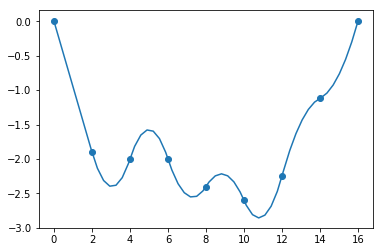

In [10]:
# np.vectorize is another way of applying a function to each element in an array, like a map or a loop.
vectorized = np.vectorize(lambda x: splines(x, spline_coefficients=spline_coefficients, xs=xs))

lp = np.linspace(min(xs), max(xs))
sp = vectorized(lp)

plt.scatter(xs, -hs)
plt.plot(lp, -sp);